# Linear Regression with one variable (Univariate Linear regression)


### Importing the required python Modules 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Loading the data from `data1.txt` using [np.loadtext](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) into an [np.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)  called `data`

In [2]:
data = np.loadtxt("data1.txt",delimiter=',')
print("The file \"{0}\" contains Data of Dimenson \"{1}\" and shape \"{2}\" ".format("data1.txt",data.ndim,data.shape))

The file "data1.txt" contains Data of Dimenson "2" and shape "(97, 2)" 


### Creating `x` and `y` from `data`

In [3]:
n_samples, n_features = data.shape
x = data[:,0].reshape(n_samples,n_features-1)
y = data[:,1].reshape(n_samples,1)
rowx,columnx = x.shape
rowy,columny = y.shape
print("\"x\" is a matrix of order \"{0}x{1}\" ".format(rowx,columnx))
print("\"y\" is a matrix of order \"{0}x{1}\" ".format(rowy,columny))

"x" is a matrix of order "97x1" 
"y" is a matrix of order "97x1" 


### Ploting the given data using [matplotlib.pyplot](https://matplotlib.org/api/pyplot_api.html)


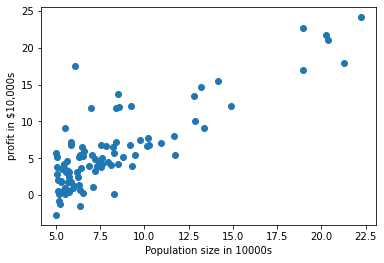

In [4]:
plt.scatter(x,y)
plt.xlabel("Population size in 10000s")
plt.ylabel("profit in $10,000s")
plt.show()

### Modifying `x` to have the first column full of 1s using [np.ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) and [np.append](https://numpy.org/doc/stable/reference/generated/numpy.append.html).

In [5]:
ones = np.ones((n_samples,1),dtype=int)
x = np.append(ones,x,axis = 1)
rowx,columnx = x.shape
print("\"x\" is a matrix of order \"{0}x{1}\"\n ".format(rowx,columnx))
print("first 10 rows of \"x\"")
print(x[0:10,:])

"x" is a matrix of order "97x2"
 
first 10 rows of "x"
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]
 [1.     8.3829]
 [1.     7.4764]
 [1.     8.5781]
 [1.     6.4862]
 [1.     5.0546]]


### Seting up Gradient Descent parameters
use [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) to create `theta`

In [6]:
theta = np.zeros((columnx,1)) 
iterations = 1500
alpha = 0.01

### Writing a function called *cost* to compute the cost function for linear regression

In [7]:
def cost(x,y,theta):
    j = np.sum(np.square((x.dot(theta)- y)))/(2*len(y))
    return j

### Testing the cost function

In [8]:
x1 = np.array([[1,2,3],[1,3,4],[1,4,5],[1,5,6]])
y1 = np.array([[7],[6],[5],[4]])
theta1 = np.array([[0.1],[0.2],[0.3]])
print(cost(x1,y1,theta1))

7.017499999999999


### Writing a function called *gradient* to use Gradient Descent algorithm to find the optimum solution for `theta`

In [9]:
def gradient(x,y,theta,alpha,n):
    j_hist = np.zeros((n,1))
    for i in range(n):        
        theta = theta-(alpha*(x.dot(theta)-y).T.dot(x)/len(y)).T
        j_hist[i] = cost(x,y,theta)
    return theta, j_hist

### Testing the `gradient` function 

Optimized theta2:
[[ 9.09595305]
 [-1.46462464]]


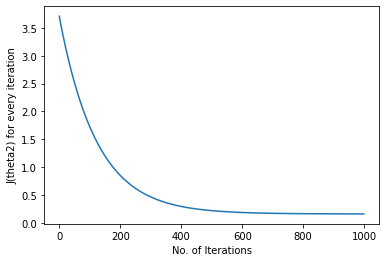

In [10]:
x2 = np.array([[1, 5], [1 ,2],[1, 4],[1, 5]])
y2 = np.array([[1], [6],[4],[2]])
theta2 = np.array([[0], [0]])
alpha2 = 0.05
n2 = 1000
theta2, j_hist2 =  gradient(x2,y2,theta2,alpha2,n2)
print("Optimized theta2:")
print(theta2)
plt.plot(range(len(j_hist2)),j_hist2)
plt.xlabel("No. of Iterations")
plt.ylabel("J(theta2) for every iteration")
plt.show()

### Applying Gradient descent to our original data i.e. `x`,`y` and `theta`

Theta
[[-3.63029144]
 [ 1.16636235]]


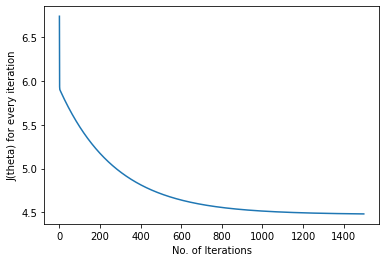

In [11]:
theta, j_hist =  gradient(x,y,theta,alpha,iterations)
print("Theta")
print(theta)
plt.plot(range(len(j_hist)),j_hist)
plt.xlabel("No. of Iterations")
plt.ylabel("J(theta) for every iteration")
plt.show()

### Predicting the value of `y` for every value of `x`.

In [12]:
prediction = x.dot(theta)

### Ploting the prediction and original data to see how well they fit.

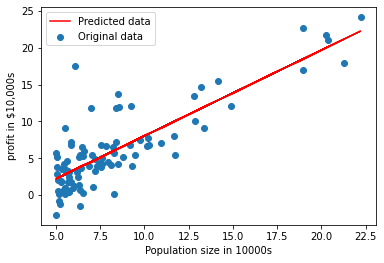

In [13]:
plt.plot(x[:,1],prediction,"-r", label="Predicted data")
plt.scatter(x[:,1],y,label="Original data")
plt.legend(loc="upper left")
plt.xlabel("Population size in 10000s")
plt.ylabel("profit in $10,000s")
plt.show()

In [14]:
def normalize(x):
    mu = np.mean(x[:,:],0).T
    sigma = np.std(x[:,:],0).T
    x[:,:] = (x[:,:]-mu)/sigma   
    return x